# Loading Dataset

Total Data = 76450
Train = 80%
Valide = 15%
Test = 5%

In [14]:
%tensorflow_version 1.x

In [15]:
!pip install imgaug==0.2.7
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [16]:
from google.colab import drive
import os
import numpy as np
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/CV_Projs") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


re


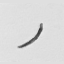

jim


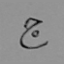

khe


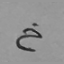

re


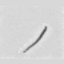

zad


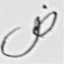

ta


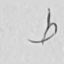

pe


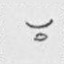

zhe


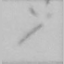

kaf


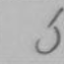

be


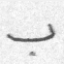

In [39]:
import pickle
import cv2
from google.colab.patches import cv2_imshow


farsi_digits_en = [
    'sefr', 'yek', 'do', 'se', 'char', 'panj', 'shish', 'haft', 'hasht', 'noh',
    'alef', 'be', 'pe', 'te', 'se', 'jim', 'che', 'he', 'khe', 'dal',
    'zal', 're', 'ze', 'zhe', 'sin', 'shin', 'sad', 'zad', 'ta', 'za',
    'ein', 'ghein', 'fe', 'ghaf', 'kaf', 'gaf', 'lam', 'mim', 'non', 'vav',
    'he', 'ye',
]
farsi_digits_fa = [
    '۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹',
    'ا', 'ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'د',
    'ذ', 'ر', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ',
    'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ل', 'م', 'ن', 'و',
    'ه', 'ی',
]

with open('farsi_handwritten_64.pkl', 'rb') as f:
    data = pickle.load(f)
    digit_data = data['digit']
    for i in range(10):
        print(farsi_digits_en[digit_data['train']['target'][i]])
        cv2_imshow(digit_data['train']['data'][i])


In [40]:
num_classes = 32
EPOCHS = 12
BS = 64

In [41]:
print(digit_data['train']['data'][5].shape)

(64, 64)


In [42]:
digit_data['train']['data'] = np.array(digit_data['train']['data'], np.float) / 255
digit_data['val']['data'] = np.array(digit_data['val']['data'], np.float) / 255
digit_data['test']['data'] = np.array(digit_data['test']['data'], np.float) / 255
digit_data['train']['data'] = np.expand_dims(digit_data['train']['data'],3)
digit_data['val']['data'] = np.expand_dims(digit_data['val']['data'],3)
digit_data['test']['data'] = np.expand_dims(digit_data['test']['data'],3)

In [43]:
digit_data['train']['target'] = np.array(digit_data['train']['target']) - 10
digit_data['val']['target'] = np.array(digit_data['val']['target']) - 10
digit_data['test']['target'] = np.array(digit_data['test']['target']) - 10

In [44]:
from keras.utils import to_categorical
train_target = to_categorical(digit_data['train']['target'], num_classes = num_classes)
valid_target = to_categorical(digit_data['val']['target'], num_classes = num_classes)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(width_shift_range=0.01)

In [24]:
print(type(aug))

<class 'keras.preprocessing.image.ImageDataGenerator'>


# Train Model

In [45]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model
def build_model(inputs):
  x = inputs

  x = Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

  x = Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x) 

  x = Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x) 

  x = Flatten()(x)

  x = Dropout(0.2)(x)

  x = Dense(128, activation="relu")(x)

  x = Dropout(0.1)(x)

  x = Dense(128, activation="relu")(x)

  x = Dense(64, activation = 'relu')(x)

  outputs = Dense(num_classes, activation="softmax")(x)

  model = Model(inputs, outputs, name="LeNet")
  model.summary()
  
  return model

In [46]:
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

input = Input((64, 64, 1))
model = build_model(input)

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])

checkpoint = ModelCheckpoint(filepath="model_letter.h5",
                             monitor="val_acc",
                             verbose=1,
                             save_best_only=True)

es = tf.keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=0.001, patience=3, verbose=1, mode='auto',
    restore_best_weights=True
)

training_log = model.fit_generator(aug.flow(digit_data['train']['data'], train_target, batch_size=BS),
                        validation_data=[digit_data['val']['data'], valid_target],
                        steps_per_epoch=len(digit_data['train']['data']) // BS,
                        epochs=EPOCHS,
                        callbacks=[checkpoint,es])

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0     

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(EPOCHS), training_log.history["loss"], label="train_loss")
plt.plot(np.arange(EPOCHS), training_log.history["acc"], label="train_acc")
plt.plot(np.arange(EPOCHS), training_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(EPOCHS), training_log.history["val_acc"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.title("training plot")
plt.legend(loc="middle right")
plt.savefig("training_plot.png")

ValueError: ignored

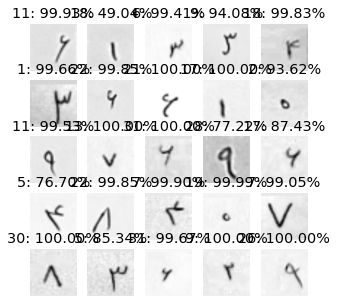

In [ ]:
model.load_weights("model_letter.h5")
plt.figure(figsize=(5, 5))
for i in range(0,100):
    image = digit_data['test']['data'][i]
    orig_img = data['letter']['test']['data'][i]
    image = np.expand_dims(image, 0)
    predictions = model.predict(image)[0]
    label = np.argmax(predictions)
    proba = np.max(predictions)
    output = cv2.resize(orig_img, (400, 400))
    plt.subplot(5, 5, i + 1)
    plt.imshow(output, cmap="gray")
    plt.axis("off")
    plt.title("{}: {:.2f}%".format(label, proba * 100))